<a href="https://colab.research.google.com/github/hieptran1812/120-DS-Interview-Questions/blob/master/Introduction_to_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





---



Notebook này sẽ có hướng dẫn về các mô hình cơ bản và được sử dụng rộng rãi trong Deep Learning:


*   Fully Connected Neural Network
*   Convolution Neural Network (CNN)
*   Recurrent Neural Network (RNN)

## Fully Connected Neural Network



In [ ]:
!pip install torch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
class MyFullyConnectedLayer(nn.Module):
  def __init__(self, input_dim, output_dim):
    """Class này sử dụng fully connected layer (hay còn gọi là dense layer)
 
    Args:
    input_dim: Số chiều đầu vào
    output_dim: Số chiều đầu ra
    """
    super(MyFullyConnectedLayer, self).__init__()
 
    # Khởi tạo fully connected layer
    self.fc = nn.Linear(input_dim, output_dim)
    # Khởi tạo activation function (ở đây sử dụng softmax)
    self.activation = nn.Softmax(dim=1)
  
  def forward(self, x):
    """Đưa input qua fully connected layer và softmax để tính đầu ra
    """
    # Đưa input qua fully connected layer
    x = self.fc(x)
    # Đưa qua softmax để tính score
    x = self.activation(x)
    return x

In [ ]:
# Khởi tạo mô hình neural network với 
# số chiều đầu vào là 128 và số chiều đầu ra là 3
model = MyFullyConnectedLayer(input_dim=128, output_dim=3)
# In ra model
print(model)

MyFullyConnectedLayer(
  (fc): Linear(in_features=128, out_features=3, bias=True)
  (activation): Softmax(dim=1)
)


In [ ]:
# Khởi tạo giá trị input ngẫu nhiên với 5 samples, mỗi sample có 128 chiều
input_data = torch.randn(5, 128)
# Đưa input qua mô hình
out = model(input_data)
# In ra kết quả
print(out)

tensor([[0.3160, 0.3423, 0.3417],
        [0.3281, 0.1286, 0.5433],
        [0.1859, 0.5296, 0.2845],
        [0.5177, 0.3477, 0.1346],
        [0.5100, 0.2915, 0.1985]], grad_fn=<SoftmaxBackward>)


## Multi layer Neural Network

In [ ]:
class MyFullyConnectedLayer(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    """Class này xây dựng mô hình neural network với 
    1 input layer, 1 hidden layer và 1 output layer

    Args:
    input_dim: Số chiều đầu vào
    hidden_dim: Số chiều tầng ẩn
    output_dim: Số chiều đầu ra
    """
    super(MyFullyConnectedLayer, self).__init__()

    # Khởi tạo hidden layer với số chiều đầu vào bằng số  chiều của input
    # và số chiều đầu ra bằng số chiều của tầng ẩn
    self.hidden_layer = nn.Linear(input_dim, hidden_dim)
    # Khởi tạo relu activation function
    self.relu = nn.ReLU()
    # Khởi tạo output layer với số chiều đầu vào bằng số chiều của tầng ẩn
    # và số chiều đầu ra bằng số chiều của ouput
    self.output = nn.Linear(hidden_dim, output_dim)
    # Khởi tạo softmax activation function
    self.softmax = nn.Softmax(dim=1)
  
  def forward(self, x):
    """Đưa input qua 1 tầng hidden layer để tính đầu ra
    """
    # Đưa input qua 1 tầng hidden layer, số chiều của x là (input_dim, hidden_dim)
    x = self.hidden_layer(x)
    # Đưa qua relu 
    x = self.relu(x)
    # Đưa qua output layer, số chiều của x là (hidden_dim, output_dim)
    x = self.output(x)
    # Tính softmax
    x = self.softmax(x)
    return x

In [ ]:
# Khởi tạo mô hình 
model = MyFullyConnectedLayer(input_dim=128, hidden_dim=256, output_dim=3)
# In ra model
print(model)

MyFullyConnectedLayer(
  (hidden_layer): Linear(in_features=128, out_features=256, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=256, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)


In [ ]:
# Khởi tạo giá trị input ngẫu nhiên với 5 samples, mỗi sample có 128 chiều
input_data = torch.randn(5, 128)
# Đưa input qua mô hình
out = model(input_data)
# In ra kết quả
print(out)

tensor([[0.4143, 0.2670, 0.3187],
        [0.2727, 0.4464, 0.2810],
        [0.4027, 0.3855, 0.2119],
        [0.4446, 0.3369, 0.2185],
        [0.3738, 0.3642, 0.2621]], grad_fn=<SoftmaxBackward>)


## Training a Neural Network

In [ ]:
# Hàm này dùng để đưa input về dạng Tensor và chuẩn hoá giá trị của ảnh về trong khoảng [0, 1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

# Download MNIST dataset
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Chia data về từng batch có số lượng là 10
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
class MyModel(nn.Module):
  """Xây dựng mô hình với 2 hidden layers và 1 output layer. 
  Sử dụng ReLU activation sau mỗi hidden layer.
  Sử dụng Softmax activation để đưa kết quả về dưới dạng xác suất.
  """
  def __init__(self):
    super(MyModel,self).__init__()
    self.hidden_1 = nn.Linear(28*28, 100) # (img_size, hidden_size_1) 
    self.hidden_2 = nn.Linear(100, 50) # (hidden_size_1, hidden_size_2)
    self.output = nn.Linear(50, 10) # (hidden_size_2, num_output)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax(dim=1)

  def forward(self, img): 
    # Chuyển input dưới dạng ảnh 2 chiều (28, 28) thành vector 1 chiều (1, 28*28)
    x = img.view(-1, 28*28)
    # Đưa qua 1 tầng hidden layer và sử dụng relu 
    x = self.relu(self.hidden_1(x)) 
    x = self.relu(self.hidden_2(x))
    # Đưa qua ouput layer và sử dụng softmax để đưa về xác suất
    x = self.output(x)
    x = self.softmax(x)
    return x
    
model = MyModel() 

In [ ]:
# Khởi tạo hàm loss, ở đây sử dụng Cross Entropy Loss
criterion = nn.CrossEntropyLoss()
# Khởi tạo hàm tối ưu Adam với learning_rate là 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Khởi tạo số epoch
epoch = 3

# Bắt đầu training
for epoch in range(epoch):
    total_loss = 0.0
    for i, data in enumerate(train_loader):
        # Lấy input từ data_loader, 
        # thông tin gồm ma trận 2 chiều (28, 28) của ảnh đầu vào
        # và giá trị label của ảnh
        inputs, labels = data

        # Đưa đạo hàm về giá trị 0
        optimizer.zero_grad()

        # Đưa input qua mô hình
        outputs = model(inputs)
        # Tính loss giữa output của mô hình và labels chuẩn
        loss = criterion(outputs, labels)
        # Tính toán đạo hàm
        loss.backward()
        # Cập nhật đạo hàm
        optimizer.step()

        # In ra giá trị loss
        total_loss += loss.item()
        if i % 2000 == 1999:    # In ra hàm loss với mỗi 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, total_loss / 2000))
            total_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.718
[1,  4000] loss: 1.588
[1,  6000] loss: 1.563
[2,  2000] loss: 1.552
[2,  4000] loss: 1.543
[2,  6000] loss: 1.542
[3,  2000] loss: 1.536
[3,  4000] loss: 1.530
[3,  6000] loss: 1.534
Finished Training


In [ ]:
# Số lượng đoán đúng
correct = 0
# Tổng số sample
total = 0

# Tính tỉ lệ mô hình dự đoán chính xác
with torch.no_grad():
    for data in test_loader:
        x, y = data
        output = model(x.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1
print(f'accuracy: {round(correct/total, 3)}')

accuracy: 0.929


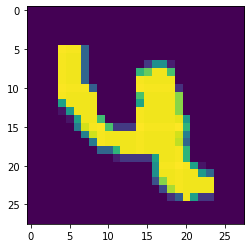

tensor(4)


In [ ]:
# Hiển thị hình ảnh và dự đoán
plt.imshow(x[2].view(28, 28))
plt.show()
print(torch.argmax(model(x[2].view(-1, 28*28))[0]))

## Convolutional Implementation

In [ ]:
class CNN(nn.Module):
  """Class này xây dựng mô hình CNN với 2 tầng convolution layers và max pooling ngay phía sau
  Sau khi có feature map từ 2 tầng convolution, output sẽ tiếp tục đưa qua 2 tầng fully 
  connected layers và qua relu activation.
  """
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5) # 1 input channels, 6 output channels, kernel size = 5
    self.pool = nn.MaxPool2d(2, 2) # kernel size = 2, stride = 2
    self.conv2 = nn.Conv2d(6, 16, 5) 
    self.fc1 = nn.Linear(16 * 5 * 5, 120) # tầng fully connected thứ nhất
    self.fc2 = nn.Linear(120, 84) # tầng fully connected thứ hai
    self.fc3 = nn.Linear(84, 10) # tầng fully connected thứ ba, cũng là output layer

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x))) # đưa qua tầng conv thứ nhất
    x = self.pool(F.relu(self.conv2(x))) # đưa qua tầng conv thứ hai
    x = x.view(-1, 16 * 5 * 5) # đưa input từ dạng nhiều chiều thành 1 chiều
    x = F.relu(self.fc1(x)) # đưa qua tầng fully connected thứ nhất
    x = F.relu(self.fc2(x)) # đưa qua tầng fully connected thứ hai
    x = self.fc3(x) # lấy output
    return x
cnn_model = CNN()

In [ ]:
# Khởi tạo hàm loss, ở đây sử dụng Cross Entropy Loss
criterion = nn.CrossEntropyLoss()
# Khởi tạo hàm tối ưu Adam với learning_rate là 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Khởi tạo số epoch
epoch = 3

# Bắt đầu training
for epoch in range(epoch):
    total_loss = 0.0
    for i, data in enumerate(train_loader):
        # Lấy input từ data_loader, 
        # thông tin gồm ma trận 2 chiều (28, 28) của ảnh đầu vào
        # và giá trị label của ảnh
        inputs, labels = data

        # Đưa đạo hàm về giá trị 0
        optimizer.zero_grad()

        # Đưa input qua mô hình
        outputs = model(inputs)
        # Tính loss giữa output của mô hình và labels chuẩn
        loss = criterion(outputs, labels)
        # Tính toán đạo hàm
        loss.backward()
        # Cập nhật đạo hàm
        optimizer.step()

        # In ra giá trị loss
        total_loss += loss.item()
        if i % 2000 == 1999:    # In ra hàm loss với mỗi 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, total_loss / 2000))
            total_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.527
[1,  4000] loss: 1.529
[1,  6000] loss: 1.526
[2,  2000] loss: 1.523
[2,  4000] loss: 1.523
[2,  6000] loss: 1.530
[3,  2000] loss: 1.523
[3,  4000] loss: 1.526
[3,  6000] loss: 1.522
Finished Training


In [ ]:
# Số lượng đoán đúng
correct = 0
# Tổng số sample
total = 0

# Tính tỉ lệ mô hình dự đoán chính xác
with torch.no_grad():
    for data in test_loader:
        x, y = data
        output = model(x.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1
print(f'accuracy: {round(correct/total, 3)}')

accuracy: 0.942


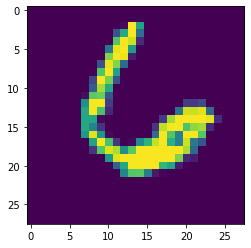

tensor(6)


In [ ]:
# Hiển thị hình ảnh và dự đoán
plt.imshow(x[0].view(28, 28))
plt.show()
print(torch.argmax(model(x[0].view(-1, 28*28))[0]))

## RNN Implementation

In [ ]:
import requests
import zipfile
import os
import string
import unicodedata
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

### Prepare data

In [ ]:
# donwload và extract data 
fileurl = "https://download.pytorch.org/tutorial/data.zip"
r = requests.get(fileurl)
open("data.zip", 'wb').write(r.content)

import zipfile
with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall(".");

In [ ]:
# data file
filepath = "data/names/"

# Khởi tạo list chứa names và labels tương ứng
line_list = []
category_list = []

# Store categories 
all_categories = []

# Loop over all files in the directory and read them
for filename in os.listdir(filepath):   
  lines = open(filepath+filename, encoding = "utf-8").read().strip().split("\n")
  line_list += lines
  category = filename.split(".")[0]
  all_categories.append(category)
  categories = [category]*len(lines)
  category_list += categories

n_categories = len(all_categories)

print("Length of line/category lists: {}/{}".format(len(line_list), len(category_list)))
print("Number of categories:", n_categories)
print("Categories:", all_categories)
print("First 5 names:", line_list[0:5])

Length of line/category lists: 20074/20074
Number of categories: 18
Categories: ['Japanese', 'Vietnamese', 'Spanish', 'Arabic', 'French', 'Scottish', 'Polish', 'Russian', 'German', 'English', 'Italian', 'Czech', 'Dutch', 'Portuguese', 'Chinese', 'Irish', 'Greek', 'Korean']
First 5 names: ['Abe', 'Abukara', 'Adachi', 'Aida', 'Aihara']


In [ ]:
# Số lượng names cho từng language
unique, counts = np.unique(category_list, return_counts=True)
print("Names per language in training data:\n", dict(zip(unique, counts)))

Names per language in training data:
 {'Arabic': 2000, 'Chinese': 268, 'Czech': 519, 'Dutch': 297, 'English': 3668, 'French': 277, 'German': 724, 'Greek': 203, 'Irish': 232, 'Italian': 709, 'Japanese': 991, 'Korean': 94, 'Polish': 139, 'Portuguese': 74, 'Russian': 9408, 'Scottish': 100, 'Spanish': 298, 'Vietnamese': 73}


### Convert names to tensors

In [ ]:
# Tạo bộ vocab cho letters
all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters)

print("Vocabulary:", all_letters)
print("Vocabulary size:", n_letters)

Vocabulary: abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'-
Vocabulary size: 58


In [ ]:
# Chuyển từ định dạng unicode sang ascii, loại bỏ các kí tự dấu
def unicode_to_ascii(s):
  return "".join(
    c for c in unicodedata.normalize("NFD", s)
    if unicodedata.category(c) != "Mn"
    and c in all_letters
  )

# Example
print("Example: Ślusàrski >>>", unicode_to_ascii("Ślusàrski"))
print("Example: Ngân >>>", unicode_to_ascii("Ngân"))

Example: Ślusàrski >>> Slusarski
Example: Ngân >>> Ngan


In [ ]:
# Tìm giá trị index cho các letter
def letter_to_index(letter):
  return all_letters.find(letter)

# Example
print("Index of letter 'g':", all_letters.find("g"))

Index of letter 'g': 6


In [ ]:
# Chuyển name thành dạng one-hot vector
def line_to_tensor(line):
  tensor = torch.zeros(len(line), 1, n_letters)
  for i, letter in enumerate(line):
    tensor[i][0][letter_to_index(letter)] = 1
  return tensor

# Chuyển toàn bộ data thành dạng ascii và one-hot vectors
line_list_clean = [unicode_to_ascii(line) for line in line_list]
line_list_tensorized = [line_to_tensor(line) for line in line_list_clean] 

# Example
print("Example name: Ngan")
print("Tensor size:", line_to_tensor("Ngan").size())
print("Tensorized name:\n", line_to_tensor("Ngan"))

Example name: Ngan
Tensor size: torch.Size([4, 1, 58])
Tensorized name:
 tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0.

### Sequence padding

In [ ]:
# tự động padding theo name có độ dài lớn nhất
sequence_length = len(max(line_list, key=len))

print("Longest name:", max(line_list, key=len))
print("Maximum sequence length:", sequence_length)

Longest name: Shirinsky-Shikhmatov
Maximum sequence length: 20


In [ ]:
# Pad sequences
line_tensor = pad_sequence(line_list_tensorized)

# Chuyển tensor thành format thích hợp cho bước sau: Number of observations, 1, sequence length, features
line_tensor_permuted = line_tensor.permute(1,2,0,3)

print("Original shape:", line_tensor.size())
print("Permuted shape:", line_tensor_permuted.size())

Original shape: torch.Size([20, 20074, 1, 58])
Permuted shape: torch.Size([20074, 1, 20, 58])


### Create NamesDataset

In [ ]:
# Chuyển tensor thành numpy array
X = line_tensor_permuted.numpy()

# Tạo dictionary để map các language thành dạng số
category_dict = dict(zip(all_categories, range(n_categories)))

# Chuyển toàn bộ label dạng text thành dạng số
category_list_numeric = [category_dict.get(i) for i in category_list]
y = np.array(category_list_numeric)

In [ ]:
class NamesDataset():
  """Tạo NamesDataset dùng để chứa thông tin về input và label
  """
  def __init__(self, features, labels):
    self.features = torch.from_numpy(features)
    self.labels = torch.from_numpy(labels).type(torch.LongTensor)
    self.len = len(features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

  def __len__(self):
    return self.len

data_train = NamesDataset(features=X, labels=y)
data_test = NamesDataset(features=X, labels=y)

### Data loaders

In [ ]:
# Batch size
batch_size = 64

# Data loaders 
trainloader = DataLoader(dataset=data_train, batch_size=batch_size, shuffle=True)
testloader = DataLoader(dataset=data_test, batch_size=batch_size, shuffle=False)

### Model

In [ ]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
    super(RNN, self).__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)   # RNN
    self.fc = nn.Linear(hidden_size, num_classes)  
    self.softmax = nn.LogSoftmax(dim=1)   # Log softmax

  def forward(self, x):
    # Khởi tạo inital hidden
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
    # Đưa input và h0 qua RNN
    out, _ = self.rnn(x, h0)
    # Lấy output từ hidden state cuối cùng
    out = self.fc(out[:, -1, :])
    # Log softmax output
    out = self.softmax(out) 
    return out

### Training model 

In [ ]:
# Sử dụng GPU nếu có
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", device)

Device: cuda


In [ ]:
# Các parameters của mô hình
input_size = n_letters   # size of vocabulary
hidden_size = 128 # hidden dim
num_layers = 2 # số hidden layer
num_classes = n_categories # số lượng languages

In [ ]:
# Khởi tạo mô hình
model = RNN(input_size, hidden_size, num_layers, num_classes) 

# Gán mô hình với device (cpu hoặc gpu)
model.to(device)

# Traing hyper-parameters
sequence_length = sequence_length   # length of padded tensors
num_epochs = 50
learning_rate = 0.005

# Loss and optimizer
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Print ra loss sau mỗi n step
print_every = 100

In [ ]:
# Bắt đầu training

start_time = time.time()

print("Start of traing -- Device: {} -- Epochs: {} -- Batches: {} -- Batch size: {}"
      .format(device, num_epochs, len(trainloader), batch_size))

# Khởi tạo các biến dùng để tính loss, accuracy và visualize
running_loss = 0
running_total = 0
running_correct = 0
loss_list = [] 
loss_list_print_every = [] 

# Đưa model về training mode
model.train()

# Train model
for epoch in range(num_epochs):
    for i, (lines, labels) in enumerate(trainloader):
        # Gán data vào device thính hợp
        lines, labels = lines.to(device), labels.to(device)
        
        # Reshape batch cho phù hợp input của rnn
        lines = lines.reshape(-1, sequence_length, input_size)
        
        # Forward and backward pass
        output = model(lines)
        loss = criterion(output, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Tính loss và accuracy
        running_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        running_total += labels.size(0)
        running_correct += (predicted == labels).sum().item()       
        loss_list.append(loss.item())

        # In ra loss và accuracy trung bình của mỗi mini-batch
        if (i+1) % print_every == 0:         
            print("Epoch: {}/{} -- Batches: {}/{} -- Training loss: {:.3f} -- Training accuracy: {:.3f}"
                  .format(epoch+1, num_epochs, i+1, len(trainloader), 
                          running_loss/print_every, running_correct/running_total))
            
            # Lưu running loss
            loss_list_print_every.append(running_loss/print_every)
            
            # Reset running loss and accuracy
            running_loss = 0
            running_total = 0
            running_correct = 0
            
print("Training complete. Total training time: {:.1f} seconds".format(time.time() - start_time))

Start of traing -- Device: cuda -- Epochs: 50 -- Batches: 314 -- Batch size: 64
Epoch: 1/50 -- Batches: 100/314 -- Training loss: 1.902 -- Training accuracy: 0.465
Epoch: 1/50 -- Batches: 200/314 -- Training loss: 1.918 -- Training accuracy: 0.465
Epoch: 1/50 -- Batches: 300/314 -- Training loss: 1.909 -- Training accuracy: 0.458
Epoch: 2/50 -- Batches: 100/314 -- Training loss: 2.161 -- Training accuracy: 0.464
Epoch: 2/50 -- Batches: 200/314 -- Training loss: 1.868 -- Training accuracy: 0.478
Epoch: 2/50 -- Batches: 300/314 -- Training loss: 1.913 -- Training accuracy: 0.462
Epoch: 3/50 -- Batches: 100/314 -- Training loss: 2.173 -- Training accuracy: 0.469
Epoch: 3/50 -- Batches: 200/314 -- Training loss: 1.878 -- Training accuracy: 0.469
Epoch: 3/50 -- Batches: 300/314 -- Training loss: 1.885 -- Training accuracy: 0.469
Epoch: 4/50 -- Batches: 100/314 -- Training loss: 2.154 -- Training accuracy: 0.464
Epoch: 4/50 -- Batches: 200/314 -- Training loss: 1.885 -- Training accuracy: 0.

### Model evaluation

In [ ]:
running_loss = 0
labels_true = np.array([], dtype=int)
labels_pred = np.array([], dtype=int)

# Đưa model to evaluation mode
model.eval()

with torch.no_grad():   # Không tính đạo hàm   
    for i, (lines, labels) in enumerate(testloader):
        lines, labels = lines.to(device), labels.to(device)
        lines = lines.reshape(-1, sequence_length, input_size).to(device)
        
        # Đưa input vào model
        output = model(lines)
        loss = criterion(output, labels)

        running_loss += loss.item()
        _, predicted = torch.max(output.data, 1)      

        # Tính accuracy
        labels_true = np.append(labels_true, labels.cpu().numpy())
        labels_pred = np.append(labels_pred, predicted.cpu().numpy())

        
test_accuracy = np.equal(labels_pred, labels_true).mean()         
        
print("Evaluating network on {} images in test set -- Test loss: {:.3f} -- Test accuracy: {:.3f}"
      .format(len(testloader.dataset), running_loss/len(testloader), test_accuracy))

Evaluating network on 20074 images in test set -- Test loss: 1.917 -- Test accuracy: 0.469


### Accuracy per category

In [ ]:
# Xây dựng ma trận 2 chiều rỗng để chứa kết quả
cm = np.zeros((num_classes, num_classes))

# Tạo confusion matrix
for i in range(len(labels_true)):
    cm[labels_true[i]][labels_pred[i]] +=1

for i in range(num_classes):
    cm[i] = cm[i] / cm[i].sum()

print("Accuracy by category:")
acc_dict = dict(zip(all_categories, [round(i, 2) for i in (cm.diagonal())]))
for i in range(len(acc_dict)):
    print(list(acc_dict.keys())[i], ":", list(acc_dict.values())[i])

Accuracy by category:
Japanese : 0.0
Vietnamese : 0.0
Spanish : 0.0
Arabic : 0.0
French : 0.0
Scottish : 0.0
Polish : 0.0
Russian : 1.0
German : 0.0
English : 0.0
Italian : 0.0
Czech : 0.0
Dutch : 0.0
Portuguese : 0.0
Chinese : 0.0
Irish : 0.0
Greek : 0.0
Korean : 0.0


In [ ]:
# Dự đoán một tên bất kì
def predict(input_line, n_predictions=3):
  input_tensorized = line_to_tensor(unicode_to_ascii(input_line))
  num_zeros = sequence_length - len(input_line)
  zeros = torch.zeros(num_zeros, 1, n_letters)
  input_tensorized = torch.cat((input_tensorized, zeros), dim = 0)
  input_tensorized = input_tensorized.permute(1,0,2)
  
  with torch.no_grad():
    input_tensorized = input_tensorized.to(device)
    output = model(input_tensorized)
    output = torch.exp(output)
    topv, topi = output.topk(n_predictions)

  print(">", input_line, "\nLanguage -- Class Probability")
  for i in range(n_predictions):
    value = topv[0][i].item()
    category_index = topi[0][i].item()
    category = all_categories[category_index]
    print("{} -- {:.2f}%".format(category, value*100))

In [ ]:
test_name = "Aguilera"
predict(test_name)

> Aguilera 
Language -- Class Probability
Russian -- 50.32%
English -- 20.62%
Arabic -- 9.22%
